In [59]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, precision_recall_fscore_support,f1_score,recall_score,precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE, ADASYN

%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action="ignore")

In [2]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [3]:
columns = ["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","num"]

In [4]:
df = pd.read_csv("C:/Users/Ahmet/Desktop/data/cleveland-0_vs_4.dat",
            sep=',',skiprows=list(np.arange(18)),names=columns)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.000,1.000,1.000,145.000,233.000,1.000,2.000,150.000,0.000,2.300,3.000,0.0,6.0,negative
1,37.000,1.000,3.000,130.000,250.000,0.000,0.000,187.000,0.000,3.500,3.000,0.0,3.0,negative
2,41.000,0.000,2.000,130.000,204.000,0.000,2.000,172.000,0.000,1.400,1.000,0.0,3.0,negative
3,56.000,1.000,2.000,120.000,236.000,0.000,0.000,178.000,0.000,0.800,1.000,0.0,3.0,negative
4,57.000,0.000,4.000,120.000,354.000,0.000,0.000,163.000,1.000,0.600,1.000,0.0,3.0,negative


Using the dataset for the risk of heart attack with class imbalance:

- Create a logistic regression model and measure the performance of it.
- By experimenting with different methods and class ratios; overcome class imbalance, determine the best performing method and class ratio.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       177 non-null    float64
 1   sex       177 non-null    float64
 2   cp        177 non-null    float64
 3   trestbps  177 non-null    float64
 4   chol      177 non-null    float64
 5   fbs       177 non-null    float64
 6   restecg   177 non-null    float64
 7   thalach   177 non-null    float64
 8   exang     177 non-null    float64
 9   oldpeak   177 non-null    float64
 10  slope     177 non-null    float64
 11  ca        177 non-null    object 
 12  thal      177 non-null    object 
 13  num       177 non-null    object 
dtypes: float64(11), object(3)
memory usage: 19.5+ KB


In [6]:
print(df.ca.unique())
print(df.thal.unique())

['0.0' '2.0' '1.0' '3.0' '<null>']
['6.0' '3.0' '7.0' '<null>']


In [7]:
df.ca.replace('<null>',np.nan,inplace=True)
df.thal.replace('<null>',np.nan,inplace=True)

In [8]:
print(df.ca.unique())
print(df.thal.unique())

['0.0' '2.0' '1.0' '3.0' nan]
['6.0' '3.0' '7.0' nan]


In [9]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          3
thal        1
num         0
dtype: int64

In [10]:
df.dropna(inplace=True)

In [11]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [12]:
df.ca = df.ca.astype("float64")
df.thal = df.thal.astype("float64")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173 entries, 0 to 176
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       173 non-null    float64
 1   sex       173 non-null    float64
 2   cp        173 non-null    float64
 3   trestbps  173 non-null    float64
 4   chol      173 non-null    float64
 5   fbs       173 non-null    float64
 6   restecg   173 non-null    float64
 7   thalach   173 non-null    float64
 8   exang     173 non-null    float64
 9   oldpeak   173 non-null    float64
 10  slope     173 non-null    float64
 11  ca        173 non-null    float64
 12  thal      173 non-null    float64
 13  num       173 non-null    object 
dtypes: float64(13), object(1)
memory usage: 20.3+ KB


In [13]:
df = df.replace({"negative" : 0, "positive":1})

In [14]:
X = df.drop("num",axis=1)
y = df["num"]

In [15]:
def create_model(X, y):
    X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.20, random_state=111, stratify = y)
    
    logreg_model = LogisticRegression()
    logreg_model.fit(X_train, y_train)

    pred_train = logreg_model.predict(X_train)
    pred_test = logreg_model.predict(X_test)
    
    conf_mtx_train = confusion_matrix(y_train, pred_train)
    conf_mtx_test = confusion_matrix(y_test, pred_test)
    
    print("Accuracy : {}\n".format(logreg_model.score(X_test, y_test)))
    
    print("Train Dataset")
    print(classification_report(y_train, pred_train))
    
    print("Test Dataset")
    print(classification_report(y_test, pred_test))
    
    print("Test Dataset - CM")
    print(conf_mtx_train)
    
    print("Test Dataset - CM")
    print(conf_mtx_test)
    
    return  None

In [16]:
create_model(X,y)

Accuracy : 0.9428571428571428

Train Dataset
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       128
           1       1.00      0.70      0.82        10

    accuracy                           0.98       138
   macro avg       0.99      0.85      0.91       138
weighted avg       0.98      0.98      0.98       138

Test Dataset
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        32
           1       1.00      0.33      0.50         3

    accuracy                           0.94        35
   macro avg       0.97      0.67      0.73        35
weighted avg       0.95      0.94      0.93        35

Test Dataset - CM
[[128   0]
 [  3   7]]
Test Dataset - CM
[[32  0]
 [ 2  1]]


- When our model is evaluated only with the accuracy score, it can be interpreted as if it works perfectly, but when we look at the recall score, we can see that it is very low.

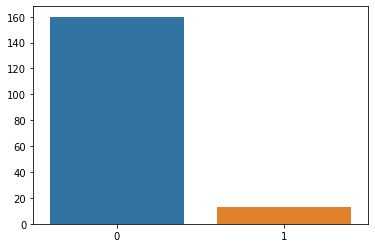

In [17]:
data = y.value_counts()
sns.barplot(data.index,data.values);

- When we look at our target variable, we can see that we are working on an unbalanced data set. To correct this situation, I will use methods such as SMOTE and ADASYN and will compare the results.

In [18]:
negative = df[df.num == 0]
positive = df[df.num == 1]

positive_upsampled = resample(positive,
                            replace = True,
                            n_samples = len(negative),
                            random_state = 111)

upsampled_df = pd.concat([negative, positive_upsampled],ignore_index=True)
upsampled_df.num.value_counts()

1    160
0    160
Name: num, dtype: int64

In [19]:
X = upsampled_df.drop("num", axis=1)
y = upsampled_df['num']

create_model(X,y)

Accuracy : 0.953125

Train Dataset
              precision    recall  f1-score   support

           0       1.00      0.95      0.98       128
           1       0.96      1.00      0.98       128

    accuracy                           0.98       256
   macro avg       0.98      0.98      0.98       256
weighted avg       0.98      0.98      0.98       256

Test Dataset
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        32
           1       0.91      1.00      0.96        32

    accuracy                           0.95        64
   macro avg       0.96      0.95      0.95        64
weighted avg       0.96      0.95      0.95        64

Test Dataset - CM
[[122   6]
 [  0 128]]
Test Dataset - CM
[[29  3]
 [ 0 32]]


- When we run our model after balancing the numbers of our target variables with upsampling, we see that our model gives much better results.

In [20]:
negative = df[df.num == 0]
positive = df[df.num == 1]
sample_len = int(len(negative)*0.8)

positive_upsampled = resample(positive,
                            replace = True,
                            n_samples = sample_len,
                            random_state = 111)

upsampled_df = pd.concat([negative, positive_upsampled],ignore_index=True)
upsampled_df.num.value_counts()

0    160
1    128
Name: num, dtype: int64

In [21]:
X = upsampled_df.drop("num", axis=1)
y = upsampled_df['num']

create_model(X,y)

Accuracy : 0.9482758620689655

Train Dataset
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       128
           1       0.94      1.00      0.97       102

    accuracy                           0.97       230
   macro avg       0.97      0.97      0.97       230
weighted avg       0.97      0.97      0.97       230

Test Dataset
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        32
           1       0.90      1.00      0.95        26

    accuracy                           0.95        58
   macro avg       0.95      0.95      0.95        58
weighted avg       0.95      0.95      0.95        58

Test Dataset - CM
[[121   7]
 [  0 102]]
Test Dataset - CM
[[29  3]
 [ 0 26]]


- When we upsample the positive values ​​up to 80% of the negative values, we can say that the accuracy value of our model drops a little, but it still gives nice results.

In [60]:
y = df.num
X = df.drop('num', axis=1)
for i in [x/10 for x in range(3,11)]:
    sm = SMOTE(random_state=27, sampling_strategy=i)
    X_smote, y_smote = sm.fit_resample(X, y)
    print(f"\nSampling strategy is {i}")
    create_model(X_smote, y_smote)


Sampling strategy is 0.3
Accuracy : 0.9523809523809523

Train Dataset
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       128
           1       0.92      0.89      0.91        38

    accuracy                           0.96       166
   macro avg       0.94      0.94      0.94       166
weighted avg       0.96      0.96      0.96       166

Test Dataset
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        32
           1       0.83      1.00      0.91        10

    accuracy                           0.95        42
   macro avg       0.92      0.97      0.94        42
weighted avg       0.96      0.95      0.95        42

Test Dataset - CM
[[125   3]
 [  4  34]]
Test Dataset - CM
[[30  2]
 [ 0 10]]

Sampling strategy is 0.4
Accuracy : 0.9333333333333333

Train Dataset
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       128
    

- When we look at different ratios, I would prefer 0.5 or 0.6 ratios.

In [66]:
for i in range(1,11):
    ad = ADASYN(random_state=27,n_neighbors= i )
    X_adasyn, y_adasyn = ad.fit_resample(X, y)
    print(f"\n For {i} neighbors")
    create_model(X_adasyn, y_adasyn)


 For 1 neighbors
Accuracy : 0.984375

Train Dataset
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       128
           1       0.97      0.99      0.98       125

    accuracy                           0.98       253
   macro avg       0.98      0.98      0.98       253
weighted avg       0.98      0.98      0.98       253

Test Dataset
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        32
           1       0.97      1.00      0.98        32

    accuracy                           0.98        64
   macro avg       0.98      0.98      0.98        64
weighted avg       0.98      0.98      0.98        64

Test Dataset - CM
[[124   4]
 [  1 124]]
Test Dataset - CM
[[31  1]
 [ 0 32]]

 For 2 neighbors
Accuracy : 0.953125

Train Dataset
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       128
           1       0.96      1.00      0

- We can say that oversampling with 5 or 7 neighbor numbers gives better results for us.

- If I need to just pick one method, I would prefer 0.5 or 0.6 ratio rate with SMOTE. It will be better because we wil have less data compared to other methods, that's important for performance and also the results are really satisfying for precision, accuracy score.